In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #vẽ biểu đồ
#!pip install --upgrade scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
!pip install openpyxl --upgrade #để xử lý file excel
from sklearn.model_selection import cross_val_score

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/outlad(gop)/'

/content/drive/MyDrive/Colab Notebooks/outlad(gop)


In [ ]:
!ls

 assessments.csv		       studentAssessment.csv
'Classification_Oulad(39week).ipynb'   studentInfo.csv
 courses.csv			       studentRegistration.csv
 first_10_weeks_summary.csv	       studentVle.csv
 first_20_weeks_summary.csv	       sum_click_by_activity_by_day.csv
 first_30_weeks_summary.csv	       sum_click_by_activity_by_week.csv
 first_39_weeks_summary.csv	      'sum_click_by_activity_by_week(final_result).csv'
 first_5_weeks_summary.csv	       sum_clicks_by_student_by_day.csv
 OULAD.names			       vle.csv
 Preproces_Outlad.ipynb


# Đọc dữ liệu

In [ ]:
data_point = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/outlad(gop)/first_39_weeks_summary.csv')
data_point.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,AAA,2013J,11391,0,0,0,0,176,0,121,...,0,0,0,0,0,10,0,21,5,Pass
1,AAA,2013J,28400,10,0,0,0,316,0,268,...,0,0,0,0,0,7,0,61,38,Pass
2,AAA,2013J,30268,0,0,0,0,87,0,27,...,0,0,0,0,0,0,0,10,3,Withdrawn
3,AAA,2013J,31604,2,0,0,0,605,0,402,...,0,0,0,0,0,10,0,125,87,Pass
4,AAA,2013J,32885,0,0,0,0,121,2,152,...,0,0,0,0,0,38,0,62,11,Pass


In [ ]:
data_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28442 entries, 0 to 28441
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        28442 non-null  object
 1   code_presentation  28442 non-null  object
 2   id_student         28442 non-null  int64 
 3   dataplus           28442 non-null  int64 
 4   dualpane           28442 non-null  int64 
 5   externalquiz       28442 non-null  int64 
 6   folder             28442 non-null  int64 
 7   forumng            28442 non-null  int64 
 8   glossary           28442 non-null  int64 
 9   homepage           28442 non-null  int64 
 10  htmlactivity       28442 non-null  int64 
 11  oucollaborate      28442 non-null  int64 
 12  oucontent          28442 non-null  int64 
 13  ouelluminate       28442 non-null  int64 
 14  ouwiki             28442 non-null  int64 
 15  page               28442 non-null  int64 
 16  questionnaire      28442 non-null  int64

# Tiền xử lý dữ liệu

In [ ]:
#Loại bỏ các mẫu dữ liệu nhãn "withdrawn"
data = data_point[data_point['final_result'].isin(['Pass', 'Distinction', 'Fail'])].reset_index(drop=True)
data.head()


,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,AAA,2013J,11391,0,0,0,0,176,0,121,...,0,0,0,0,0,10,0,21,5,Pass
1,AAA,2013J,28400,10,0,0,0,316,0,268,...,0,0,0,0,0,7,0,61,38,Pass
2,AAA,2013J,31604,2,0,0,0,605,0,402,...,0,0,0,0,0,10,0,125,87,Pass
3,AAA,2013J,32885,0,0,0,0,121,2,152,...,0,0,0,0,0,38,0,62,11,Pass
4,AAA,2013J,38053,7,0,0,0,723,4,440,...,0,0,0,0,0,5,0,76,44,Pass


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21957 entries, 0 to 21956
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        21957 non-null  object
 1   code_presentation  21957 non-null  object
 2   id_student         21957 non-null  int64 
 3   dataplus           21957 non-null  int64 
 4   dualpane           21957 non-null  int64 
 5   externalquiz       21957 non-null  int64 
 6   folder             21957 non-null  int64 
 7   forumng            21957 non-null  int64 
 8   glossary           21957 non-null  int64 
 9   homepage           21957 non-null  int64 
 10  htmlactivity       21957 non-null  int64 
 11  oucollaborate      21957 non-null  int64 
 12  oucontent          21957 non-null  int64 
 13  ouelluminate       21957 non-null  int64 
 14  ouwiki             21957 non-null  int64 
 15  page               21957 non-null  int64 
 16  questionnaire      21957 non-null  int64

In [ ]:
data['final_result'] = data['final_result'].replace('Distinction', 'Pass')
data.shape

(21957, 24)

In [ ]:
data['final_result'] = data['final_result'].replace({'Pass': 1, 'Fail': 0})
print(data)

      code_module code_presentation  id_student  dataplus  dualpane  \
0             AAA             2013J       11391         0         0   
1             AAA             2013J       28400        10         0   
2             AAA             2013J       31604         2         0   
3             AAA             2013J       32885         0         0   
4             AAA             2013J       38053         7         0   
...           ...               ...         ...       ...       ...   
21952         GGG             2014J     2620947         0         0   
21953         GGG             2014J     2640965         0         0   
21954         GGG             2014J     2645731         0         0   
21955         GGG             2014J     2648187         0         0   
21956         GGG             2014J     2684003         0         0   

       externalquiz  folder  forumng  glossary  homepage  ...  ouwiki  page  \
0                 0       0      176         0       121  ...       

<ipython-input-51-7bbf6846b713>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['final_result'] = data['final_result'].replace({'Pass': 1, 'Fail': 0})


<ipython-input-29-86ae990447f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['final_result'], kde = False, rug = "True")


<Axes: xlabel='final_result'>

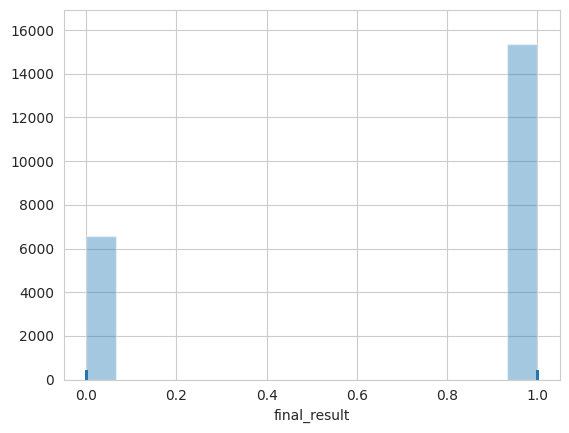

In [ ]:
sns.set_style("whitegrid")
sns.distplot(data['final_result'], kde = False, rug = "True")

Xem thông tin về data

Xem data dưới dạng biểu đồ

In [ ]:
#data.pop('code_module')#loại bỏ 3 cột này
#data.pop('code_presentation')
#data.pop('id_student')
#data

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,0,0,0,0,176,0,121,0,0,454,...,0,0,0,0,0,10,0,21,5,1
1,10,0,0,0,316,0,268,0,0,472,...,0,0,0,0,0,7,0,61,38,1
2,2,0,0,0,605,0,402,0,0,758,...,0,0,0,0,0,10,0,125,87,1
3,0,0,0,0,121,2,152,0,0,353,...,0,0,0,0,0,38,0,62,11,1
4,7,0,0,0,723,4,440,0,0,821,...,0,0,0,0,0,5,0,76,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21952,0,0,0,0,18,4,86,0,0,203,...,0,0,0,116,0,23,0,19,0,1
21953,0,0,0,0,0,0,19,0,0,6,...,0,0,0,0,0,4,0,9,0,0
21954,0,0,0,0,65,5,167,0,0,348,...,0,0,0,152,0,109,0,47,0,1
21955,0,0,0,0,0,1,57,0,0,78,...,0,0,0,129,0,15,0,17,0,1


<Axes: >

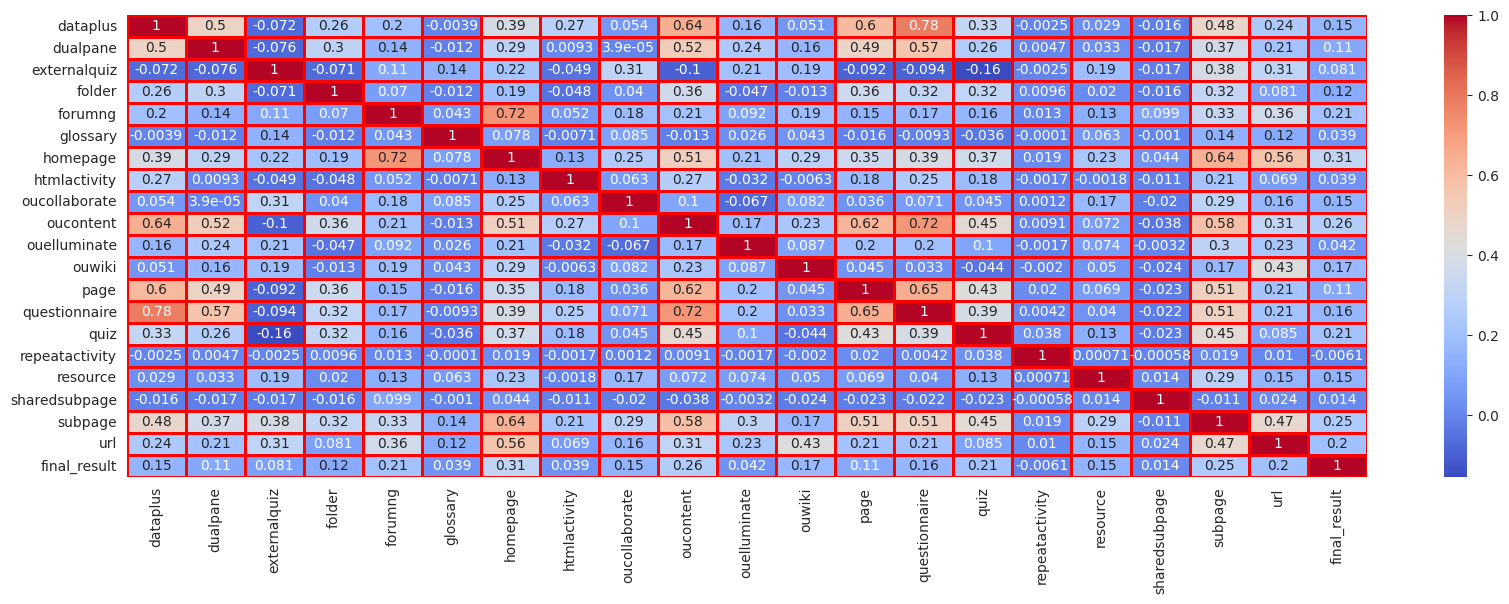

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm") #biểu đô tương quan giữa các biến dựa trên phương sai và độ lệch sai

# Resampling-Kmean


In [ ]:
data_Pass = data[data['final_result']==1]
data_Fail = data[data['final_result']==0]
data_Pass.info()
data_Fail.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15382 entries, 0 to 21956
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        15382 non-null  object
 1   code_presentation  15382 non-null  object
 2   id_student         15382 non-null  int64 
 3   dataplus           15382 non-null  int64 
 4   dualpane           15382 non-null  int64 
 5   externalquiz       15382 non-null  int64 
 6   folder             15382 non-null  int64 
 7   forumng            15382 non-null  int64 
 8   glossary           15382 non-null  int64 
 9   homepage           15382 non-null  int64 
 10  htmlactivity       15382 non-null  int64 
 11  oucollaborate      15382 non-null  int64 
 12  oucontent          15382 non-null  int64 
 13  ouelluminate       15382 non-null  int64 
 14  ouwiki             15382 non-null  int64 
 15  page               15382 non-null  int64 
 16  questionnaire      15382 non-null  int64 
 17

In [ ]:
from sklearn.cluster import KMeans
X_pass = data_Pass.iloc[:, 3:23]
#y_pass = data_Pass.iloc[:, -1]
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_pass)
data_Pass['cluster'] = kmeans.labels_
data_Pass.shape


<ipython-input-32-7fba6019d79f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Pass['cluster'] = kmeans.labels_


(15382, 25)

In [ ]:
data_Pass.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result,cluster
0,AAA,2013J,11391,0,0,0,0,176,0,121,...,0,0,0,0,10,0,21,5,1,0
1,AAA,2013J,28400,10,0,0,0,316,0,268,...,0,0,0,0,7,0,61,38,1,0
2,AAA,2013J,31604,2,0,0,0,605,0,402,...,0,0,0,0,10,0,125,87,1,0
3,AAA,2013J,32885,0,0,0,0,121,2,152,...,0,0,0,0,38,0,62,11,1,0
4,AAA,2013J,38053,7,0,0,0,723,4,440,...,0,0,0,0,5,0,76,44,1,0


In [ ]:
output_csv_path='./39week/data_Pass.csv'
data_Pass.to_csv(output_csv_path, index=False)

In [ ]:
#Tính số mẫu của 2 cụnp.ma
count_cluster_0 = data_Pass[data_Pass['cluster'] == 0].shape[0]
count_cluster_1 = data_Pass[data_Pass['cluster'] == 1].shape[0]

#Tính tỉ lệ cần xóa
proportion_delete=(len(data_Pass)-len(data_Fail))/len(data_Pass)
print(count_cluster_0)
print(count_cluster_1)
print(proportion_delete)

12527
2855
0.5725523338967624


In [ ]:
#Tính số mẫu cầu xóa
remove_cluster_0 = int(proportion_delete * count_cluster_0)
remove_cluster_1 = int(proportion_delete * count_cluster_1)

In [ ]:
# Lấy mẫu ngẫu nhiên từ mỗi nhóm để xóa
drop_cluster_0 = data_Pass[data_Pass['cluster'] == 0].sample(n=remove_cluster_0, random_state=42)
drop_cluster_1 = data_Pass[data_Pass['cluster'] == 1].sample(n=remove_cluster_1, random_state=42)

# Xóa các mẫu đã chọn từ DataFrame ban đầu
data_Pass_balanced = data_Pass.drop(drop_cluster_0.index).drop(drop_cluster_1.index)

# Hiển thị số lượng mẫu còn lại trong mỗi nhóm
print(data_Pass_balanced['cluster'].value_counts())

cluster
0    5355
1    1221
Name: count, dtype: int64


In [ ]:
data_balance_by_kmean=pd.concat([data_Pass_balanced,data_Fail])
data_balance_by_kmean=data_balance_by_kmean.drop(columns=['cluster'])
data_balance_by_kmean.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
1,AAA,2013J,28400,10,0,0,0,316,0,268,...,0,0,0,0,0,7,0,61,38,1
2,AAA,2013J,31604,2,0,0,0,605,0,402,...,0,0,0,0,0,10,0,125,87,1
4,AAA,2013J,38053,7,0,0,0,723,4,440,...,0,0,0,0,0,5,0,76,44,1
5,AAA,2013J,45462,2,0,0,0,108,0,287,...,0,0,0,0,0,4,0,87,23,1
6,AAA,2013J,45642,4,0,0,0,417,0,288,...,0,0,0,0,0,14,0,120,56,1


In [ ]:
output_csv_path='./39week/data_balance_by_kmean.csv'
data_balance_by_kmean.to_csv(output_csv_path, index=False)

# Chuẩn hóa dữ liệu

In [ ]:
data.pop('code_module')#loại bỏ 3 cột này
data.pop('code_presentation')
data.pop('id_student')
data

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,0,0,0,0,176,0,121,0,0,454,...,0,0,0,0,0,10,0,21,5,1
1,10,0,0,0,316,0,268,0,0,472,...,0,0,0,0,0,7,0,61,38,1
2,2,0,0,0,605,0,402,0,0,758,...,0,0,0,0,0,10,0,125,87,1
3,0,0,0,0,121,2,152,0,0,353,...,0,0,0,0,0,38,0,62,11,1
4,7,0,0,0,723,4,440,0,0,821,...,0,0,0,0,0,5,0,76,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21952,0,0,0,0,18,4,86,0,0,203,...,0,0,0,116,0,23,0,19,0,1
21953,0,0,0,0,0,0,19,0,0,6,...,0,0,0,0,0,4,0,9,0,0
21954,0,0,0,0,65,5,167,0,0,348,...,0,0,0,152,0,109,0,47,0,1
21955,0,0,0,0,0,1,57,0,0,78,...,0,0,0,129,0,15,0,17,0,1


In [ ]:
y = data.iloc[:, -1]

# Gán X là các cột còn lại
X = data.iloc[:, :-1]

# Hiển thị 5 dòng đầu tiên của X và y để kiểm tra kết quả
print(X.shape)
print(y.shape)

(21957, 20)
(21957,)


In [ ]:
data_balance_by_kmean.pop('code_module')#loại bỏ 3 cột này
data_balance_by_kmean.pop('code_presentation')
data_balance_by_kmean.pop('id_student')
data_balance_by_kmean

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
1,10,0,0,0,316,0,268,0,0,472,...,0,0,0,0,0,7,0,61,38,1
2,2,0,0,0,605,0,402,0,0,758,...,0,0,0,0,0,10,0,125,87,1
4,7,0,0,0,723,4,440,0,0,821,...,0,0,0,0,0,5,0,76,44,1
5,2,0,0,0,108,0,287,0,2,799,...,0,0,0,0,0,4,0,87,23,1
6,4,0,0,0,417,0,288,0,1,507,...,0,0,0,0,0,14,0,120,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21935,0,0,0,0,171,1,188,0,0,100,...,0,0,0,25,0,79,0,21,0,0
21946,0,0,0,0,9,1,46,0,0,63,...,0,0,0,94,0,2,0,15,0,0
21947,0,0,0,0,462,26,495,0,0,320,...,0,0,0,96,0,116,0,46,0,0
21948,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [ ]:
y_res_kmean = data_balance_by_kmean.iloc[:, -1]

# Gán X là các cột còn lại
X_res_kmean = data_balance_by_kmean.iloc[:, :-1]

# Hiển thị 5 dòng đầu tiên của X và y để kiểm tra kết quả
print(X_res_kmean.shape)
print(y_res_kmean.shape)

(13151, 20)
(13151,)


In [ ]:
# chuẩn hóa dữ liệu bằng MinMaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
#np.set_printoptions(threshold=np.inf)


In [ ]:
# chuẩn hóa dữ liệu bằng MinMaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_res_kmean)
X_res_kmean = scaler.transform(X_res_kmean)
#np.set_printoptions(threshold=np.inf)


# Resampling - SMOTE

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
#resamping bằng SMOTE
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
X_res_SMOTE, y_res_SMOTE = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res_SMOTE))

Original dataset shape Counter({1: 15382, 0: 6575})
Resampled dataset shape Counter({1: 15382, 0: 15382})


In [ ]:
print(X_res_SMOTE.shape)
print(y_res_SMOTE.shape)

(30764, 20)
(30764,)


In [ ]:
y_res_SMOTE

,final_result
0,1
1,1
2,1
3,1
4,1
...,...
30759,0
30760,0
30761,0
30762,0


In [ ]:
X_res_kmean

array([[0.06993007, 0.        , 0.        , ..., 0.        , 0.01411057,
        0.01937787],
       [0.01398601, 0.        , 0.        , ..., 0.        , 0.02891511,
        0.04436512],
       [0.04895105, 0.        , 0.        , ..., 0.        , 0.01758038,
        0.02243753],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.01064076,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00208189,
        0.        ]])

# Phân chia Tập Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_res_kmean_train, X_res_kmean_test, y_res_kmean_train, y_res_kmean_test = train_test_split(X_res_kmean, y_res_kmean, test_size=0.25, random_state=42)

In [ ]:
X_res_SMOTE_train, X_res_SMOTE_test, y_res_SMOTE_train, y_res_SMOTE_test = train_test_split(X_res_SMOTE, y_res_SMOTE, test_size=0.25, random_state=42)

# Decision Tree

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [ ]:
#Phân loại với dữ liệu ban đầu
clf=tree.DecisionTreeClassifier(min_samples_leaf=6,max_depth=4)
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))

Accuracy: 0.8111111111111111
Precision: 0.8135593220338984
Recall: 0.944386149003148
AUC: 0.7263647073978791
F1: 0.874104649751123


In [ ]:
#Phân loại với dữ liệu đã resampling SMOTE
clf=tree.DecisionTreeClassifier(min_samples_leaf=6,max_depth=4)
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.7642699258874008
Precision: 0.752341054706752
Recall: 0.7907277907277908
AUC: 0.7641628509774724
F1: 0.7710569516353075


In [ ]:
clf=tree.DecisionTreeClassifier(criterion="gini",min_samples_leaf=6,max_depth=4)
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.7408759124087592
Precision: 0.7048593350383632
Recall: 0.8336358136721113
AUC: 0.7403653074476764
F1: 0.7638580931263859


# SVM

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm


SVM - RBF

In [ ]:
C = 10
clf=svm.SVC(kernel="rbf")
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))


Accuracy: 0.8109289617486338
Precision: 0.835348162475822
Recall: 0.9063483735571878
AUC: 0.7502540437511803
F1: 0.8694011071967791


In [ ]:
clf=svm.SVC(kernel="rbf")
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.7772721362631647
Precision: 0.7770897832817337
Recall: 0.7801087801087802
AUC: 0.7772606563729278
F1: 0.778596355176425


In [ ]:
clf=svm.SVC(kernel="rbf")
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.7536496350364964
Precision: 0.7606679035250464
Recall: 0.7441016333938294
AUC: 0.7537021928437038
F1: 0.7522935779816514


SVM - SIGMOID

In [ ]:
clf=svm.SVC(kernel="sigmoid")
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))

Accuracy: 0.7151183970856102
Precision: 0.7973544973544974
Recall: 0.7906610703043022
AUC: 0.6670826209685993
F1: 0.7939936775553214


In [ ]:
clf=svm.SVC(kernel="sigmoid")
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.6577818229098947
Precision: 0.662695260788986
Recall: 0.6482776482776483
AUC: 0.6578202862798163
F1: 0.6554071746530505


In [ ]:
clf=svm.SVC(kernel="sigmoid")
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.652676399026764
Precision: 0.65569774527727
Recall: 0.6509376890502118
AUC: 0.6526859699073689
F1: 0.6533090467516697


SVM - LINEAR

In [ ]:
clf=svm.SVC(kernel="linear")
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))

Accuracy: 0.694535519125683
Precision: 0.6945507563331511
Recall: 0.9997376705141658
AUC: 0.5004647828136979
F1: 0.8196580277449188


In [ ]:
clf=svm.SVC(kernel="linear")
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.7276036926277467
Precision: 0.8028120713305898
Recall: 0.6063196063196064
AUC: 0.7280945290083671
F1: 0.6908661649697506


In [ ]:
clf=svm.SVC(kernel="linear")
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.712287104622871
Precision: 0.7948290241868223
Recall: 0.5765275257108288
AUC: 0.7130344050572492
F1: 0.6683029453015428


# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))

Accuracy: 0.8123861566484517
Precision: 0.8394338701805759
Recall: 0.9024134312696747
AUC: 0.7551399695084965
F1: 0.8697850821744627


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.837992458717982
Precision: 0.8839941262848752
Recall: 0.7795907795907796
AUC: 0.8382288101609251
F1: 0.8285163776493256


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.7548661800486618
Precision: 0.7426934097421204
Recall: 0.7840290381125227
AUC: 0.7547056505547325
F1: 0.7628016480282519


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [ ]:
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))

Accuracy: 0.7954462659380692
Precision: 0.7894510226049516
Recall: 0.9619622245540399
AUC: 0.6895627570922762
F1: 0.8672105947735603


In [ ]:
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.7281237810427773
Precision: 0.7987846049966238
Recall: 0.6127946127946128
AUC: 0.7285905178855571
F1: 0.6935365674923054


In [ ]:
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.7153284671532847
Precision: 0.7898140662894099
Recall: 0.5910465819721719
AUC: 0.7160125876221716
F1: 0.6761245674740485


# Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(learning_rate=0.001)

In [ ]:
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("AUC:",metrics.roc_auc_score(y_test, prediction))
print("F1:",metrics.f1_score(y_test, prediction))

Accuracy: 0.6943533697632058
Precision: 0.6943533697632058
Recall: 1.0
AUC: 0.5
F1: 0.8196086863040206


In [ ]:
clf=clf.fit(X_res_SMOTE_train,y_res_SMOTE_train)
prediction=clf.predict(X_res_SMOTE_test)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction))

Accuracy: 0.7907944350539592
Precision: 0.755328798185941
Recall: 0.8627298627298627
AUC: 0.7905033125659757
F1: 0.8054648772820698


In [ ]:
clf=clf.fit(X_res_kmean_train,y_res_kmean_train)
prediction=clf.predict(X_res_kmean_test)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction))

Accuracy: 0.7627737226277372
Precision: 0.738394320043692
Recall: 0.8179068360556564
AUC: 0.7624702375996937
F1: 0.7761194029850746


# ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=200, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

In [ ]:
history = ann.fit(X_train, y_train, batch_size=64, epochs=120)

Epoch 1/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7761 - Precision: 0.7669 - Recall: 0.9292 - accuracy: 0.7496 - loss: 0.5061
Epoch 2/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8293 - Precision: 0.8257 - Recall: 0.9372 - accuracy: 0.8166 - loss: 0.4363
Epoch 3/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8440 - Precision: 0.8297 - Recall: 0.9347 - accuracy: 0.8205 - loss: 0.4198
Epoch 4/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8454 - Precision: 0.8284 - Recall: 0.9314 - accuracy: 0.8170 - loss: 0.4247
Epoch 5/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8583 - Precision: 0.8369 - Recall: 0.9364 - accuracy: 0.8271 - loss: 0.4016
Epoch 6/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8554 - Precision: 0.8341 - Recall: 0.9458 - accuracy: 0.8302 - loss: 0.4013
Epoch 7/120
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8567 - Precision: 0.8358 - Recall: 0.9351 - accuracy: 0.8253 - loss: 0.4018
Epoch 8/120
258/258 ━━━━━━━━━━━━━━

In [ ]:
prediction=ann.predict(X_test)
prediction_binary= (prediction >= 0.5).astype(int)
print(prediction_binary)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_binary))
print("Precision:",metrics.precision_score(y_test, prediction_binary))
print("Recall:",metrics.recall_score(y_test, prediction_binary))
print("AUC:",metrics.roc_auc_score(y_test, prediction_binary))
print("F1:",metrics.f1_score(y_test, prediction_binary))

Accuracy: 0.8269581056466302
Precision: 0.8285123966942148
Recall: 0.9467471143756558
AUC: 0.7507871447921186
F1: 0.883692458374143


In [ ]:
ann_SMOTE = tf.keras.models.Sequential()
ann_SMOTE.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_SMOTE.add(tf.keras.layers.Dense(units=200, activation='relu'))
ann_SMOTE.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann_SMOTE.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann_SMOTE.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)
history = ann_SMOTE.fit(X_res_SMOTE_train, y_res_SMOTE_train, batch_size=64, epochs=50)

Epoch 1/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - AUC: 0.7856 - Precision: 0.6971 - Recall: 0.7509 - accuracy: 0.7126 - loss: 0.5543
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.8362 - Precision: 0.7318 - Recall: 0.8123 - accuracy: 0.7566 - loss: 0.4961
Epoch 3/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8467 - Precision: 0.7422 - Recall: 0.8067 - accuracy: 0.7641 - loss: 0.4784
Epoch 4/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8538 - Precision: 0.7423 - Recall: 0.8303 - accuracy: 0.7715 - loss: 0.4663
Epoch 5/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8622 - Precision: 0.7584 - Recall: 0.8175 - accuracy: 0.7784 - loss: 0.4557
Epoch 6/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8628 - Precision: 0.7509 - Recall: 0.8158 - accuracy: 0.7753 - loss: 0.4521
Epoch 7/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8641 - Precision: 0.7549 - Recall: 0.8296 - accuracy: 0.7814 - loss: 0.4495
Epoch 8/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
prediction=ann_SMOTE.predict(X_res_SMOTE_test)
prediction_binary= (prediction >= 0.5).astype(int)
print(prediction_binary)
print("Accuracy:",metrics.accuracy_score(y_res_SMOTE_test, prediction_binary))
print("Precision:",metrics.precision_score(y_res_SMOTE_test, prediction_binary))
print("Recall:",metrics.recall_score(y_res_SMOTE_test, prediction_binary))
print("AUC:",metrics.roc_auc_score(y_res_SMOTE_test, prediction_binary))
print("F1:",metrics.f1_score(y_res_SMOTE_test, prediction_binary))

241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.8052268885710571
Precision: 0.81133069828722
Recall: 0.7974617974617975
AUC: 0.8052583138745019
F1: 0.8043364681295716


In [ ]:
ann_Kmean = tf.keras.models.Sequential()
ann_Kmean.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_Kmean.add(tf.keras.layers.Dense(units=200, activation='relu'))
ann_Kmean.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann_Kmean.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann_Kmean.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)
history = ann_Kmean.fit(X_res_kmean_train, y_res_kmean_train, batch_size=64, epochs=50)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7780 - Precision: 0.7032 - Recall: 0.7110 - accuracy: 0.7084 - loss: 0.5654
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8410 - Precision: 0.7284 - Recall: 0.8475 - accuracy: 0.7645 - loss: 0.4850
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8487 - Precision: 0.7301 - Recall: 0.8569 - accuracy: 0.7678 - loss: 0.4773
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8440 - Precision: 0.7283 - Recall: 0.8409 - accuracy: 0.7633 - loss: 0.4854
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8483 - Precision: 0.7434 - Recall: 0.8429 - accuracy: 0.7711 - loss: 0.4790
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8480 - Precision: 0.7449 - Recall: 0.8095 - accuracy: 0.7649 - loss: 0.4764
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8472 - Precision: 0.7368 - Recall: 0.8433 - accuracy: 0.7699 - loss: 0.4820
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
prediction=ann_Kmean.predict(X_res_kmean_test)
prediction_binary= (prediction >= 0.5).astype(int)
print(prediction_binary)
print("Accuracy:",metrics.accuracy_score(y_res_kmean_test, prediction_binary))
print("Precision:",metrics.precision_score(y_res_kmean_test, prediction_binary))
print("Recall:",metrics.recall_score(y_res_kmean_test, prediction_binary))
print("AUC:",metrics.roc_auc_score(y_res_kmean_test, prediction_binary))
print("F1:",metrics.f1_score(y_res_kmean_test, prediction_binary))

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]
Accuracy: 0.7667274939172749
Precision: 0.7228370221327968
Recall: 0.8693284936479129
AUC: 0.7661627177719686
F1: 0.7893435869266685
